In [1]:
import cv2
import os
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
img_folder = "calibration5"
img_paths = [os.path.join(img_folder, f) for f in os.listdir(img_folder)]
print(img_paths[0:2])

['calibration5\\GOPR01170000.jpg', 'calibration5\\GOPR01170001.jpg']


In [3]:
imgs = [cv2.imread(path, cv2.COLOR_BGR2GRAY) for path in img_paths]

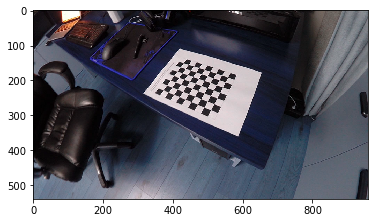

In [4]:
img = imgs[50]
plt.imshow(img)
plt.show()

In [5]:
result, corners = cv2.findChessboardCornersSB(img, (9, 7))

In [6]:
corn_img = cv2.drawChessboardCorners(img, (9, 7), corners, result)

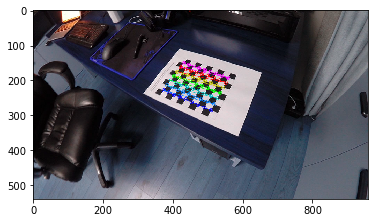

In [7]:
plt.imshow(corn_img)
plt.show()

In [8]:
objp = np.zeros((7*9,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:9].T.reshape(-1,2)

In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], img.shape[0:2], None, None)

In [10]:
print(f"ret: {ret}\n mtx: {mtx}\n dist: {dist}\n rvecs: {rvecs}\n tvecs: {tvecs}")

ret: 45.70253635512627
 mtx: [[1.43345074e+03 0.00000000e+00 3.00746415e+02]
 [0.00000000e+00 8.43123500e+02 3.63325629e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
 dist: [[ -0.99202573  14.82269931   0.10722249  -0.65457384 -23.96100984]]
 rvecs: [array([[ 1.72760304],
       [ 1.00779287],
       [-1.826103  ]])]
 tvecs: [array([[12.93386854],
       [-9.69497907],
       [44.60190202]])]


In [11]:
points2d = []
points3d = []
for img in tqdm(imgs[0:1368]):
    result, corners = cv2.findChessboardCorners(img, (9, 7))
    if result is True:
        points2d.append(corners)
        points3d.append(objp)

100%|██████████████████| 1368/1368 [01:06<00:00, 20.61it/s]


In [15]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(points3d[::10], points2d[::10], img.shape[0:2], None, None)

In [16]:
print(f"Camera matrix:\n {mtx}\n\n Distorsion:\n {dist}\n\n")

Camera matrix:
 [[401.49843547   0.         269.5       ]
 [  0.         500.45885592 479.5       ]
 [  0.           0.           1.        ]]

 Distorsion:
 [[-6.72064130e-03  7.72624373e-06  1.06571388e-04  2.48209756e-05
  -2.41292010e-09]]




In [66]:
img.shape

(540, 960, 3)